Кузьмин Вадим БПМ-142

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as img 

In [2]:
image = img.imread('task_292151.png')
image.shape

(512, 512, 4)

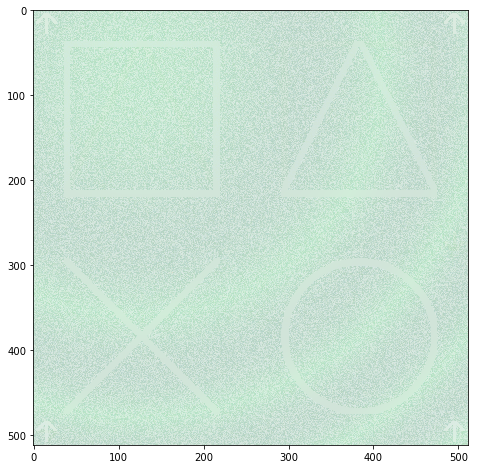

In [3]:
plt.figure(figsize = (8,8))
plt.imshow(image)

In [4]:
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]
alpha = image[:,:,3]

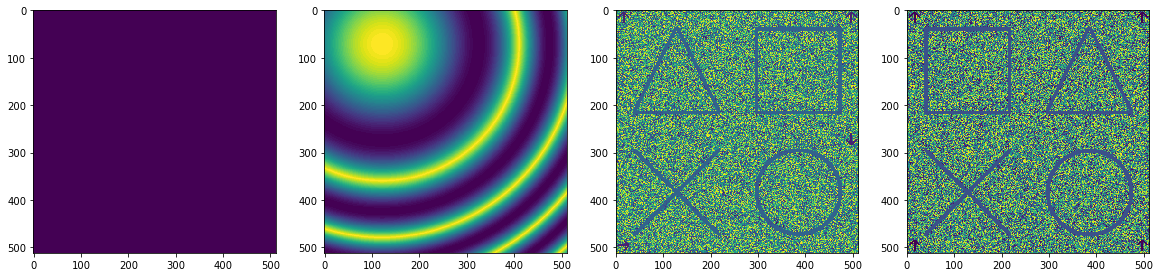

In [5]:
f, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(red)
ax[1].imshow(green)
ax[2].imshow(blue)
ax[3].imshow(alpha)

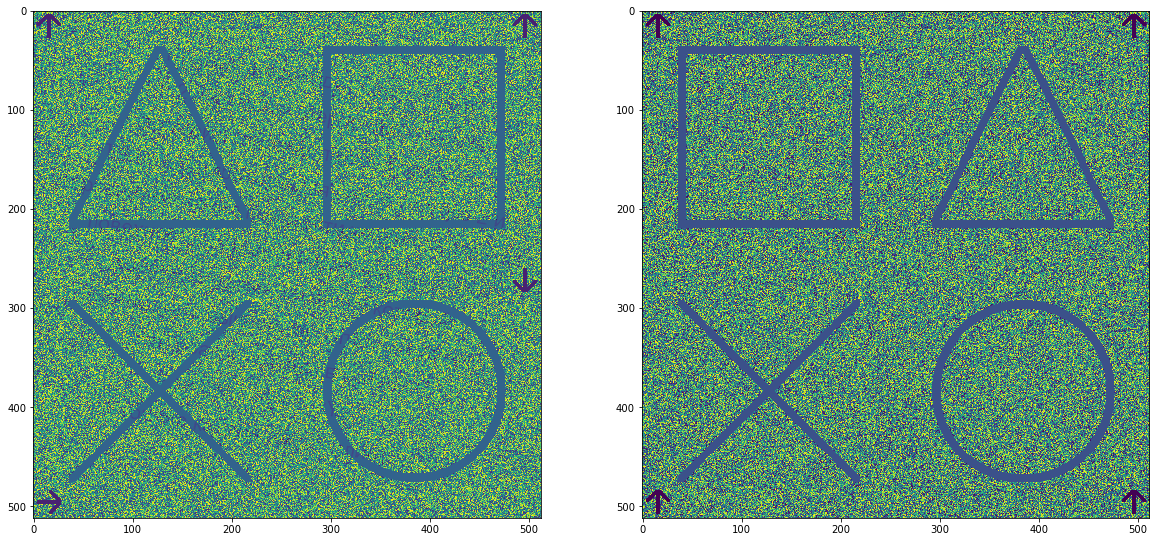

In [6]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(blue)
ax[1].imshow(alpha)

Видно, что задание на канале Blue

In [7]:
a1 = alpha[0:256,0:256] 
a2 = alpha[256:512,0:256]
a3 = alpha[0:256,256:512]
a4 = alpha[256:512,256:512]

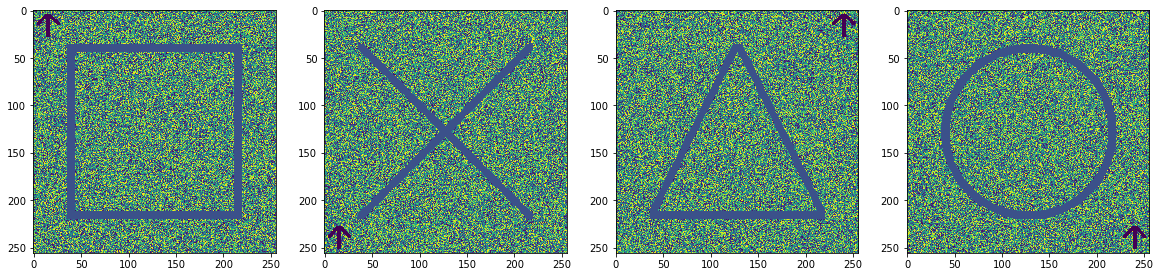

In [8]:
f, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(a1)
ax[1].imshow(a2)
ax[2].imshow(a3)
ax[3].imshow(a4)

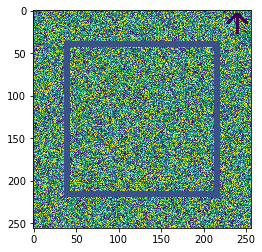

In [9]:
a1 = a1.T
a1 = np.rot90(a1, -1)
plt.imshow(a1)

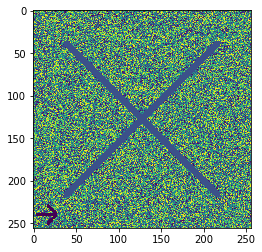

In [10]:
a2 = a2.T
a2 = np.rot90(a2)
a2 = np.rot90(a2)
plt.imshow(a2)

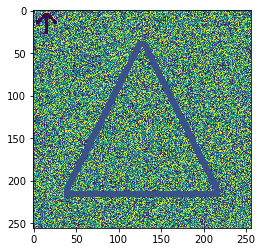

In [11]:
a3 = a3.T
a3 = np.rot90(a3, -1)
plt.imshow(a3)

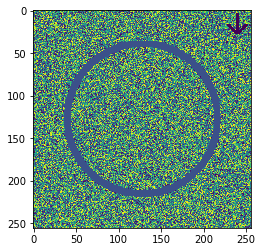

In [12]:
a4 = a4.T
a4 = np.rot90(a4, -1)
a4 = np.rot90(a4, -1)
a4 = np.rot90(a4, -1)
plt.imshow(a4)

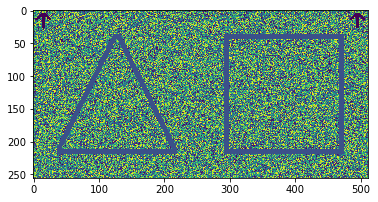

In [13]:
top = np.hstack((a3,a1))
plt.imshow(top)

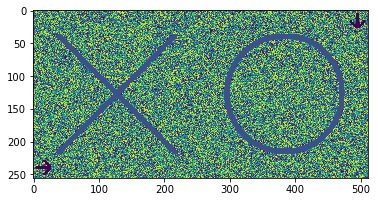

In [14]:
bottom = np.hstack((a2,a4))
plt.imshow(bottom)

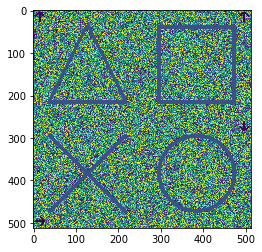

In [15]:
combined = np.vstack((top,bottom))
plt.imshow(combined)

In [16]:
task = blue - combined

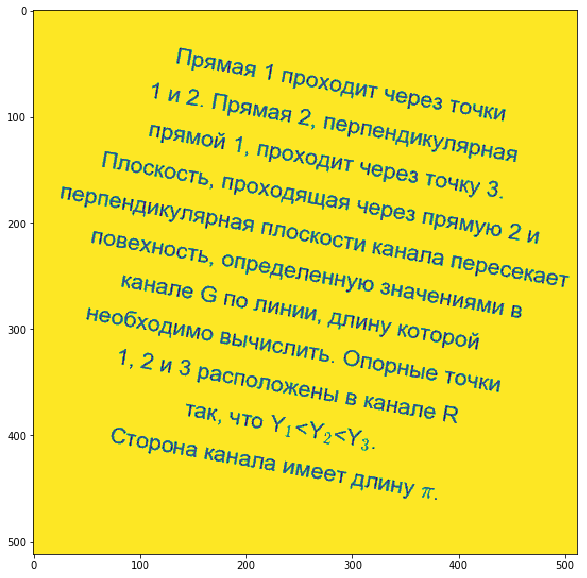

In [17]:
plt.figure(figsize = (10,10))
plt.imshow(task)

In [18]:
np.max(red)

0.50196081

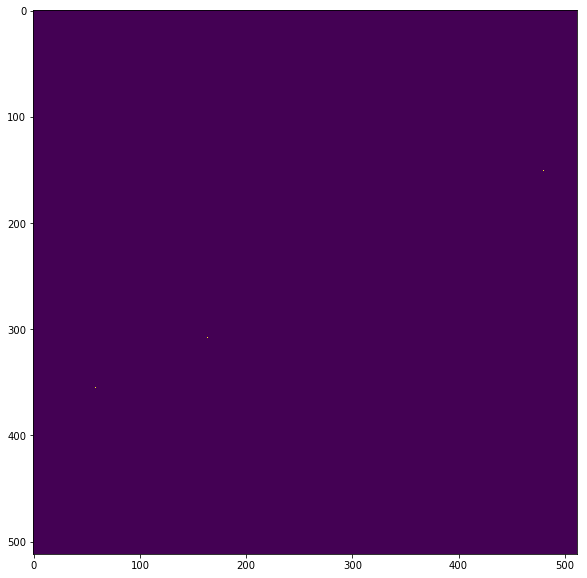

In [19]:
plt.figure(figsize = (10,10))
plt.imshow(red)

In [20]:
dots = []
for i in range(512):
    for j in range(512):
        if red[i,j]!=0:
            dots.append([i,j])

In [21]:
dots

[[151, 480], [308, 164], [355, 58]]

In [22]:
dot1 = dots[0]
dot2 = dots[1]
dot3 = dots[2]

In [23]:
x = [dot1[0], dot2[0]]
y = [dot1[1], dot2[1]]

In [24]:
def line1(t):
    return (y[1]-y[0])*(t-x[0])/(x[1]-x[0])+y[0]

In [25]:
def line1y(t):
    return ((x[1]-x[0])/(y[1]-y[0]))*t-((x[1]-x[0])/(y[1]-y[0]))*y[0]+x[0]

In [26]:
def line2(t):
    return dot3[1]-1/((y[1]-y[0])/(x[1]-x[0]))*(t-dot3[0])

In [27]:
def line2y(t):
    return dot3[0]-((y[1]-y[0])/(x[1]-x[0]))*(t-dot3[1])

In [38]:
xi = np.arange(int(line2y(0)),512)
yi = [int(line2(i)) for i in xi]
zi = [green[xi[i],yi[i]] for i in range(len(xi))]

In [60]:
red_new = np.copy(red)

In [61]:
for i in range(len(xi)):
    red_new[xi[i],yi[i]] = 0.6

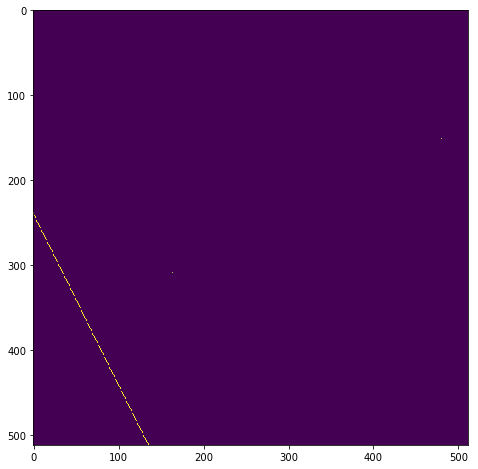

In [70]:
plt.figure(figsize = (8,8))
plt.imshow(red_new)

In [65]:
r = [ np.sqrt((xi[i]-xi[i-1])**2+(yi[i]-yi[i-1])**2+(zi[i]-zi[i-1])**2) for i in range(1,len(xi))]

In [69]:
length = np.pi/512*np.sum(r)
length

2.018229886268295